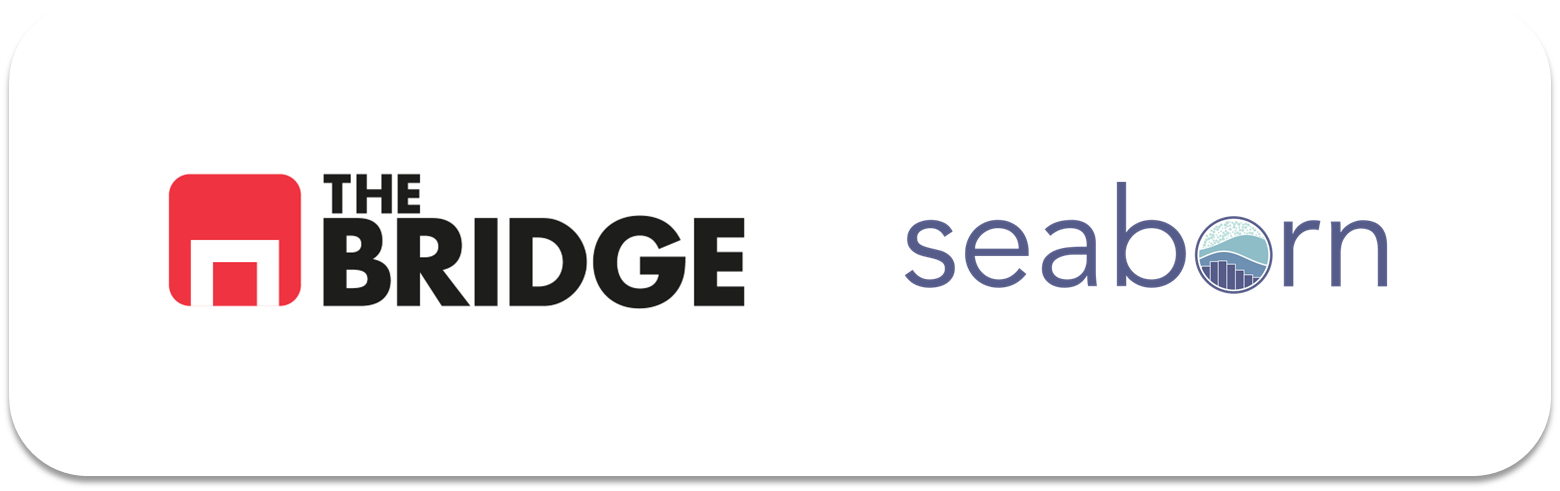

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [4]:
df_cali = pd.read_csv("./data/california_cities.csv")

df_cali.dropna(inplace = True)

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [5]:
def scatter_plot_with_controls(df, x_col, y_col,color_col = None, size_col = "", scale=1, legend = True):

    fig, ax = plt.subplots(figsize = (20,10)) # Cuando creas 1 sólo gráfico no hace falta poner 1,1
    # Creamos el scatter en función de los argumentos de entrada
    sizes = (100,1000)
    if type(size_col) == str: # So 
        if size_col != "": # Si el argumento size es un str consideramos que es una de las columnas del dataframe
            if color_col: # Ahora comprobamos que realmente haya columna de color
                scatter = sns.scatterplot(x = x_col, y = y_col, size = df[size_col] * scale, data = df, hue = color_col, 
                                          alpha = 0.5, palette = "viridis", ax = ax, sizes = sizes)
            else: # No hay columna de color, así que no lo pasamos como argumento y dejamos que lo escoja el método
                scatter = sns.scatterplot(x = x_col, y = y_col, size = df[size_col] * scale, data = df, 
                                          alpha = 0.5, palette = "viridis", ax = ax, sizes = sizes)
        elif color_col: # Si hay categoria de color y además datos de tamaño que no son una columna
            scatter = sns.scatterplot(x = x_col, y = y_col, data = df, hue = color_col, alpha=0.5, palette='viridis', ax = ax, sizes = sizes) # Ojo no aplicamos la escala
    else:
        scatter = sns.scatterplot(x = x_col, y = y_col, size = size_col, data = df, alpha=0.5, palette='viridis', ax = ax, sizes = sizes) # Ojo no aplicamos la escala, ni el color
    # Labels

    if legend:
        ax.legend(ncol = 2, loc="upper right", frameon = False, labelspacing = 2)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    return ax



### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

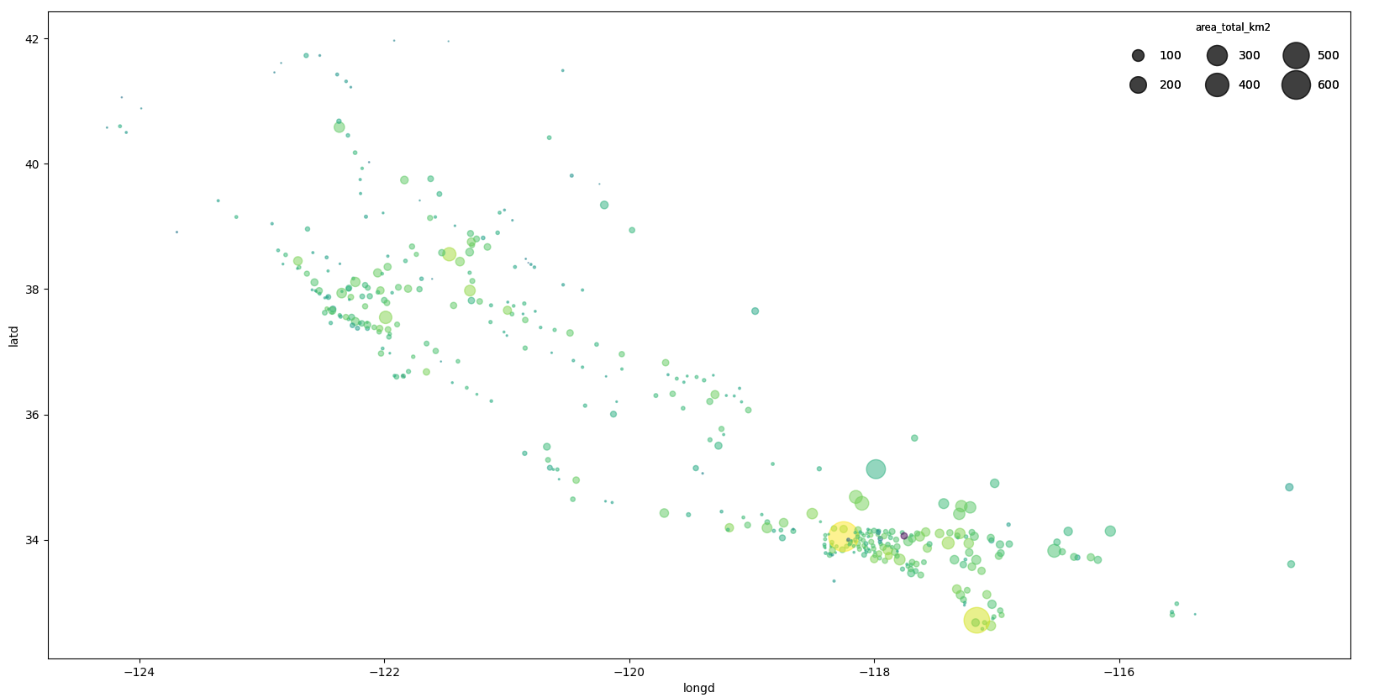

In [11]:
df_cali["log_poblacion"] = np.log(df_cali["population_total"])

<Axes: xlabel='longd', ylabel='latd'>

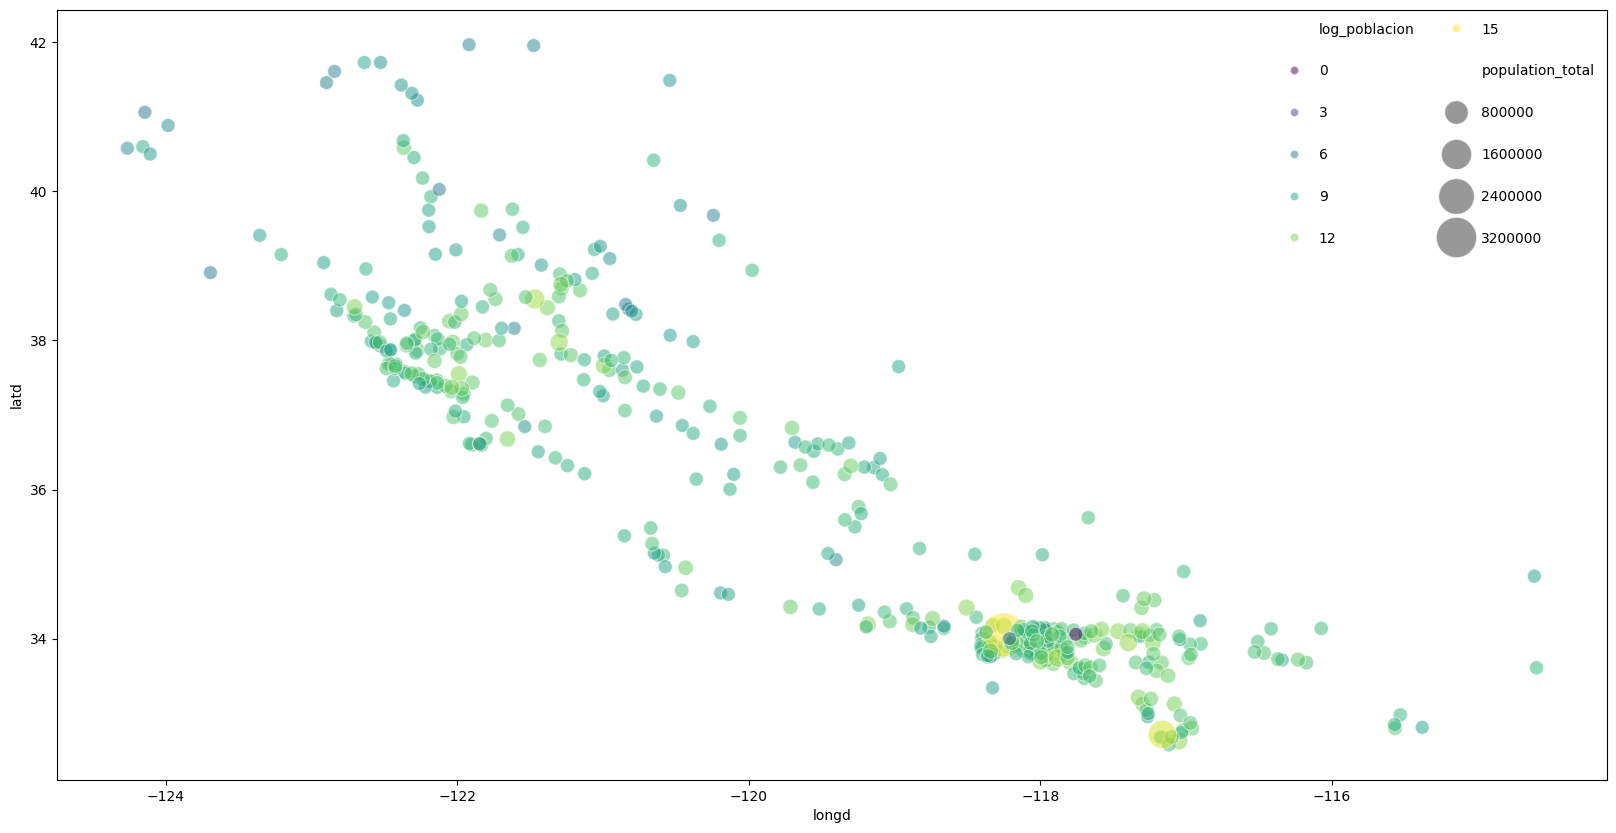

In [13]:
scatter_plot_with_controls(df_cali, "longd", "latd", color_col = "log_poblacion", size_col = "population_total")

<Axes: xlabel='longd', ylabel='latd'>

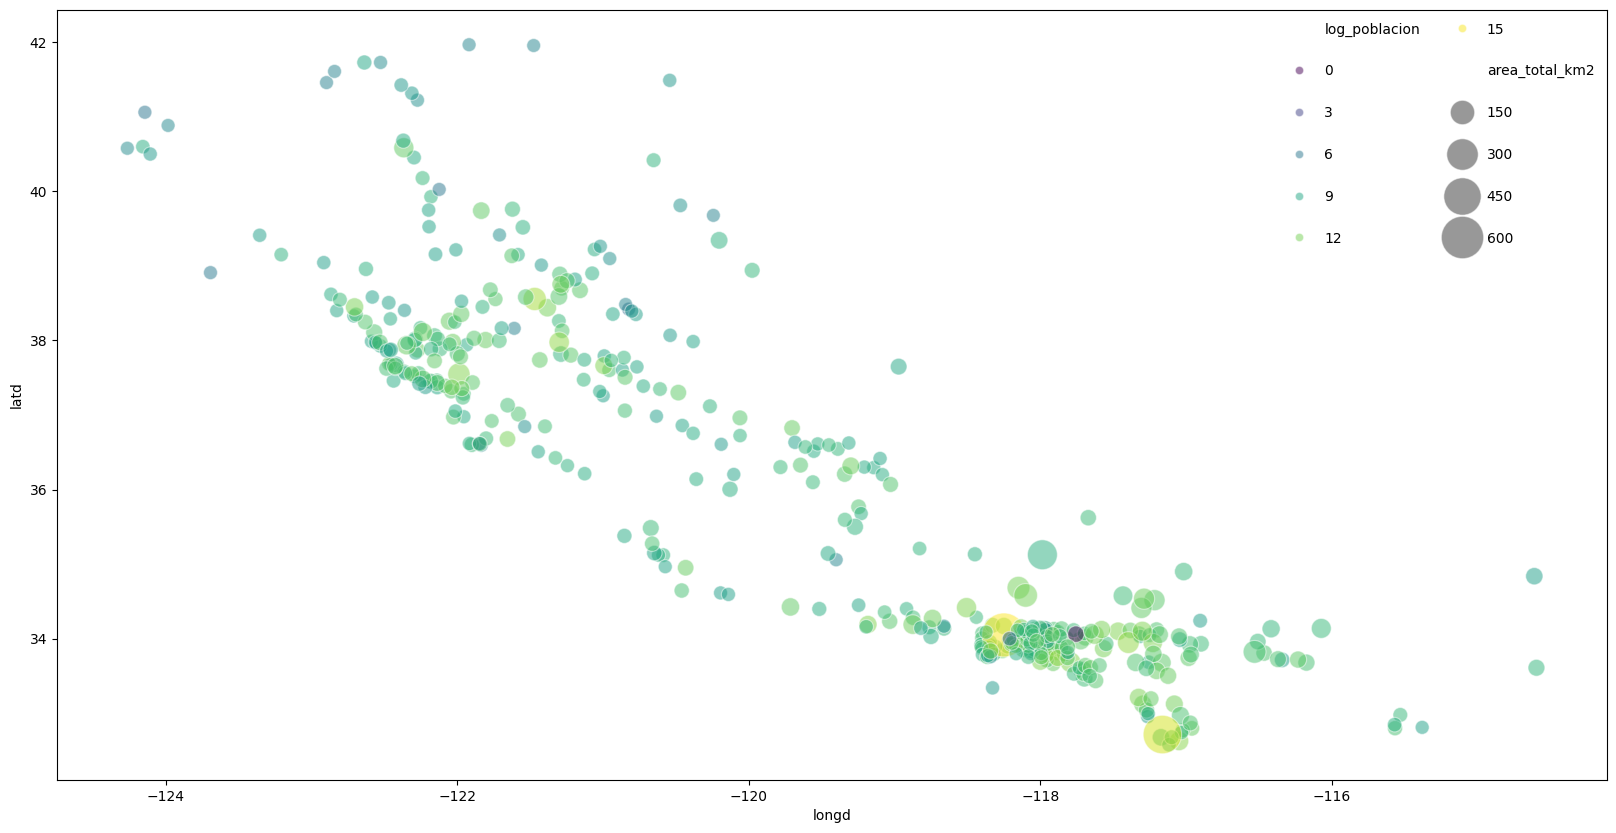

In [16]:
scatter_plot_with_controls(df_cali, "longd", "latd", color_col = "log_poblacion", size_col = "area_total_km2", scale = 0.5)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [2]:
df_cali = pd.read_csv("./data/california_cities.csv")

df_cali.dropna(inplace = True)

In [17]:
df_titanic = pd.read_csv("./data/titanic.csv")

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["who"]).T
tabla_contingencia["freq_yes"] = (tabla_contingencia["yes"]/(tabla_contingencia["yes"] + tabla_contingencia["no"])).round(3) * 100
tabla_contingencia

alive,no,yes,freq_yes
who,,,
child,34,49,59.0
man,449,88,16.4
woman,66,205,75.6


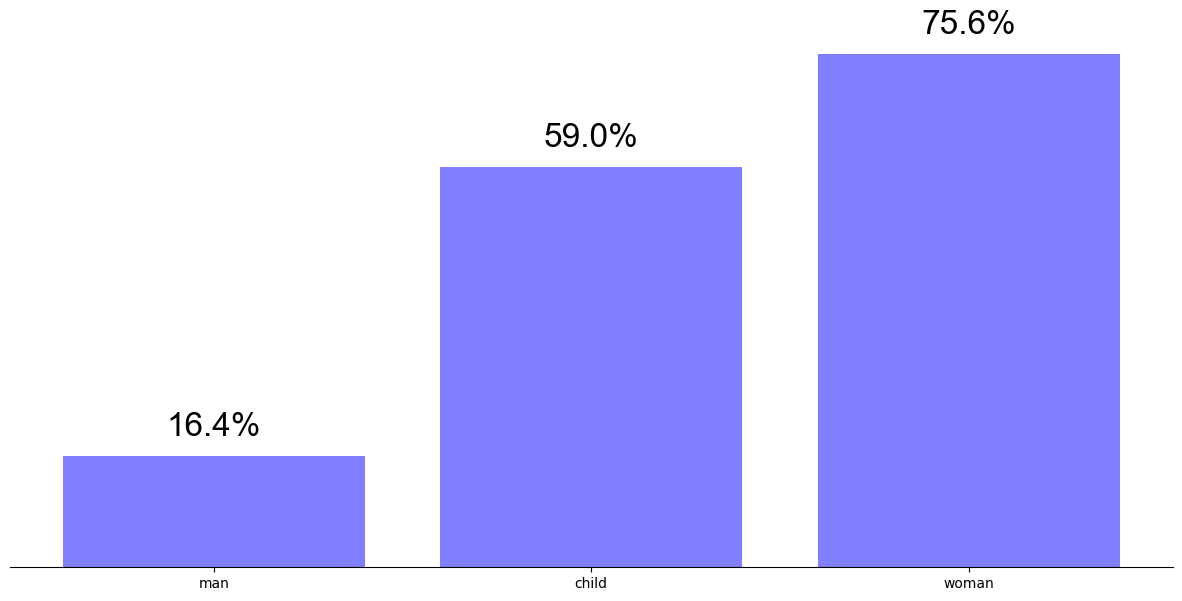

In [19]:
fig,ax = plt.subplots(figsize = (15,7))
ax.bar(tabla_contingencia.sort_values("freq_yes").index.to_list(), height = tabla_contingencia.sort_values("freq_yes").freq_yes.to_list(), color = "blue", alpha = 0.5)
ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["man","child","woman"]:
    valor = tabla_contingencia.loc[categoria, "freq_yes"]
    ax.text(categoria, valor+ 3, f"{round(valor,2)}%", ha = "center", fontdict = dict(family= "Arial", size = 24))

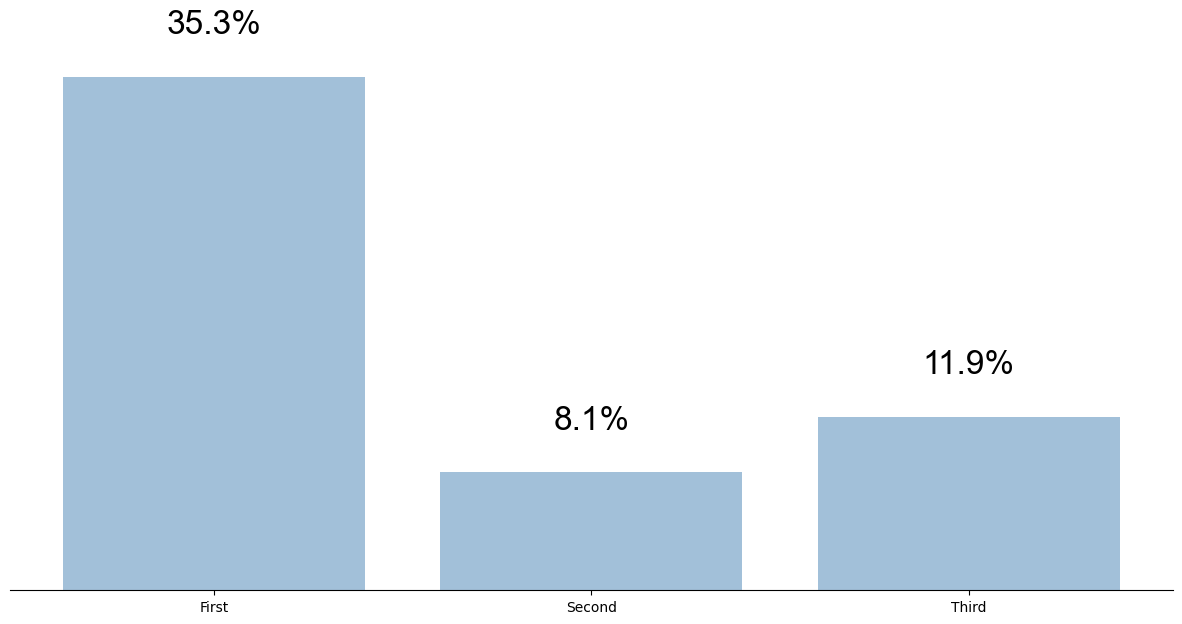

In [21]:
df_man = df_titanic.loc[df_titanic.who == "man"]
tabla_contingencia = pd.crosstab(df_man["alive"],df_man["class"]).T
tabla_contingencia["freq_yes"] = (tabla_contingencia["yes"]/(tabla_contingencia["yes"] + tabla_contingencia["no"])).round(3) * 100
tabla_contingencia

fig,ax = plt.subplots(figsize = (15,7))
ax.bar(tabla_contingencia.index.to_list(), height = tabla_contingencia.freq_yes.to_list(), color = "steelblue", alpha = 0.5)
ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["First","Second","Third"]:
    valor = tabla_contingencia.loc[categoria, "freq_yes"]
    ax.text(categoria, valor+ 3, f"{round(valor,2)}%", ha = "center", fontdict = dict(family= "Arial", size = 24))

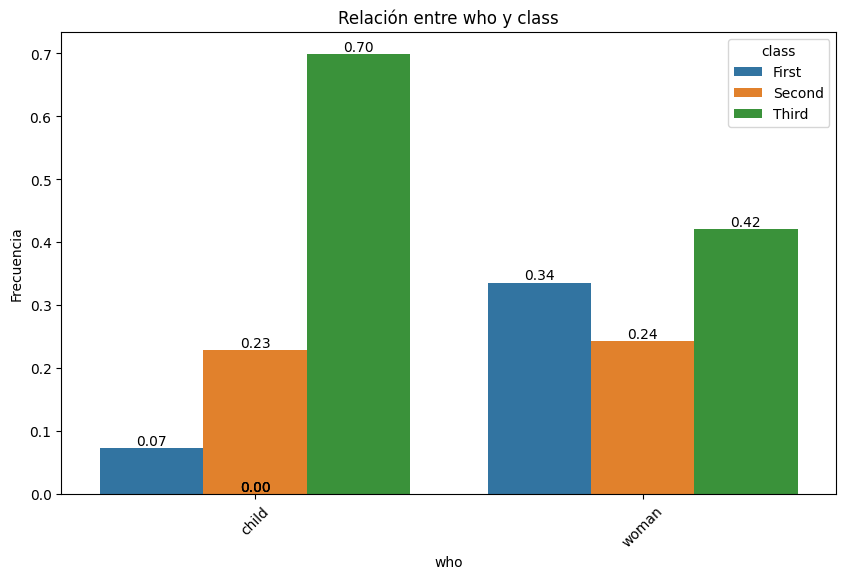

In [22]:
df_cw = df_titanic.loc[df_titanic.who.isin(["child","woman"])]
from bootcampviztools import plot_categorical_relationship_fin

plot_categorical_relationship_fin(df_cw, "who","class", relative_freq = True, show_values = True)

In [23]:
for puerto in df_titanic.dropna().embark_town.unique():
    df = df_titanic.loc[df_titanic.embark_town == puerto]
    tasa = ((df.alive.value_counts(normalize = True)*100).round(2))["yes"]
    print(puerto,f"{tasa}%")

Cherbourg 55.36%
Southampton 33.7%
Queenstown 38.96%


In [24]:
df_titanic.groupby("embark_town")["who"].value_counts(normalize = True)

embark_town  who  
Cherbourg    man      0.535714
             woman    0.357143
             child    0.107143
Queenstown   man      0.480519
             woman    0.454545
             child    0.064935
Southampton  man      0.636646
             woman    0.270186
             child    0.093168
Name: proportion, dtype: float64

In [25]:
df_titanic.groupby("embark_town")["class"].value_counts(normalize = True)

embark_town  class 
Cherbourg    First     0.505952
             Third     0.392857
             Second    0.101190
Queenstown   Third     0.935065
             Second    0.038961
             First     0.025974
Southampton  Third     0.548137
             Second    0.254658
             First     0.197205
Name: proportion, dtype: float64

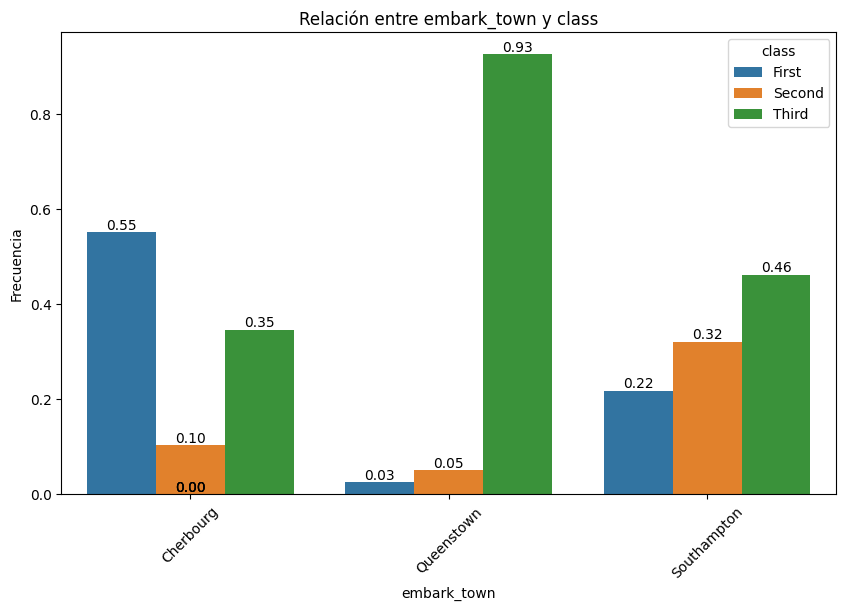

In [26]:
plot_categorical_relationship_fin(df_cw, "embark_town","class", relative_freq = True, show_values = True)

<Axes: xlabel='alive', ylabel='Count'>

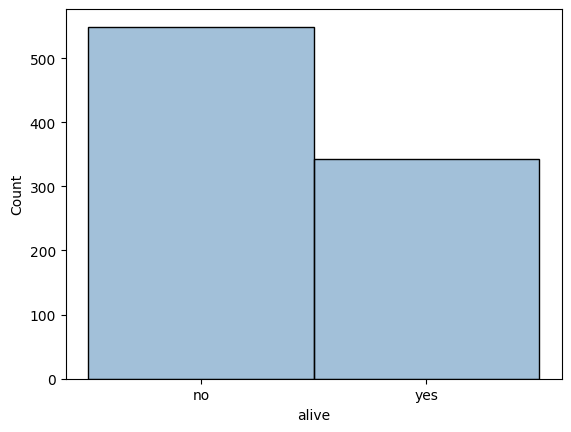

In [27]:
sns.histplot(df_titanic["alive"].dropna(), bins = 30, color = "steelblue", alpha = 0.5)